In [18]:
import matplotlib.pyplot as plot
import matplotlib.dates as dates
import pydata_google_auth
import pandas as pd
from google.cloud import bigquery

# client = bigquery.Client()
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)
# GOOGLE_APPLICATION_CREDENTIALS = credentials
# GOOGLE_APPLICATION_CREDENTIALS = ApprenticeshipOAuth.json
project_id = 'apprenticeship-299321'
# hardcoding the pie chart keys and manually setting the colours to be consistent is really not the way I'd like to handle this
threeColorsArray = ['#FFC6FF', '#CAFFBF', '#FFD6A5'] # tablet, desktop, mobile
threeColorsArray1 = ['#FFC6FF', '#FFD6A5', '#CAFFBF'] # tablet, mobile, desktop
threeColorsArray2 = ['#FFD6A5', '#CAFFBF', '#FFC6FF'] # mobile, desktop, tablet
rainbowArray = ['#FFADAD', '#FFD6A5', '#FDFFB6', '#CAFFBF', '#9BF6FF', '#A0C4FF', '#BDB2FF', '#FFC6FF']
singleColorArray = ["#BDB2FF"]


In [26]:
def runQuery(queryName):
    query = pd.read_gbq(queryName, project_id=project_id, dialect='standard', credentials=credentials)
    print(query)
    return query

# def printQuery(queryName):
#     results = client.query(queryName)
#     for row in results:
#         print(str(row))

  deviceCategory  deviceCategoryCount
0         tablet                 5216
1        desktop                 5263
2         mobile                 5368


<AxesSubplot:ylabel='deviceCategoryCount'>

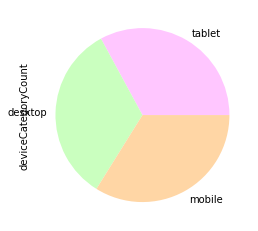

In [3]:
# TODO: title axes properly
# TODO: should this be SUM(sessions)?
query2 = """
    SELECT deviceCategory, COUNT(*) AS deviceCategoryCount
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY deviceCategoryCount ASC
"""
runQuery(query2).plot.pie(x='deviceCategory', y='deviceCategoryCount', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])

In [24]:
# for testing CONVERT and CAST - can delete
# #legacySQL
query21 = """
    SELECT deviceCategory, CAST(COUNT(*) AS string) AS deviceCategoryCount
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY deviceCategoryCount ASC
"""
runQuery(query21)
# runQuery(query2).plot.pie(x='deviceCategory', y='deviceCategoryCount', colors=threeColorsArray, legend=False, labels=["tablet", "desktop", "mobile"])
print("...")
query81 = """
    SELECT LEFT(CAST(date AS string), 4) AS dateString, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY dateString
    ORDER BY dateString ASC
"""
runQuery(query81)
# so I can confirm that it's casting properly etc.

  deviceCategory deviceCategoryCount
0         tablet                5216
1        desktop                5263
2         mobile                5368
...
  dateString  conversionRate
0       2017          0.0359
1       2018          0.0370


,dateString,conversionRate
0,2017,0.0359
1,2018,0.0370


     channelGrouping  channelGroupingCount
0         Newsletter                   503
1   Partner referral                   503
2       Email alerts                   516
3        Retargeting                  1085
4            Display                  1216
5              Email                  1475
6            (Other)                  1491
7             Social                  1501
8        Aggregators                  1501
9        Paid Search                  1511
10            Direct                  1515
11          Referral                  1515
12    Organic Search                  1515


<AxesSubplot:xlabel='channelGrouping'>

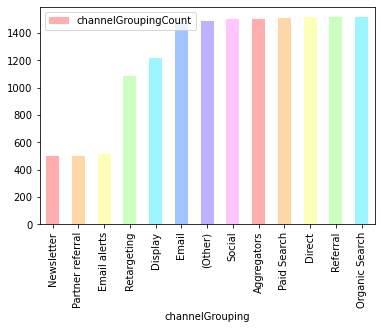

In [4]:
# again, re-evaluate whether this should be SUM - what does the data represent?
query3 = """
    SELECT channelGrouping, COUNT(*) AS channelGroupingCount
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY channelGroupingCount ASC
"""
runQuery(query3).plot.bar(x='channelGrouping', y='channelGroupingCount', color=rainbowArray)

In [5]:
# # query4 = """
# #     SELECT date, SUM(sessions) AS numberOfSessions
# #     FROM `apprenticeship-299321.sample_data.datatable`
# #     GROUP BY date
# #     ORDER BY date ASC
# # """
# query4 = """
#     SELECT PARSE_DATETIME('%s', CAST(TRUNC(event_timestamp/1000000) AS STRING)) AS numberOfSessions
#     FROM apprenticeship-299321.sample_data.datatable
#     GROUP BY date
#     ORDER BY date ASC
# """
# runQuery(query4).plot.bar(x='date', y='numberOfSessions', color=singleColorArray)

  deviceCategory  averageConversionsPerDeviceCategory
0         tablet                                 20.4
1         mobile                                 38.6
2        desktop                                 53.7


<AxesSubplot:ylabel='averageConversionsPerDeviceCategory'>

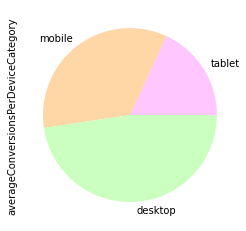

In [6]:
# this is rounded to 1 decimal place, while other data is rounded to 4 -
# this is because ideally I'd have used significant figures
query5 = """
    SELECT deviceCategory, ROUND(AVG(conversions), 1) as averageConversionsPerDeviceCategory
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY averageConversionsPerDeviceCategory
"""
runQuery(query5).plot.pie(y='averageConversionsPerDeviceCategory', colors=threeColorsArray1, legend=False, labels=["tablet", "mobile", "desktop"])

  deviceCategory  conversionRatePerDeviceCategory
0         mobile                           0.0261
1        desktop                           0.0430
2         tablet                           0.0551


<AxesSubplot:ylabel='conversionRatePerDeviceCategory'>

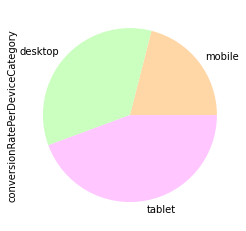

In [7]:
query6 = """
    SELECT deviceCategory, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerDeviceCategory
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY deviceCategory
    ORDER BY conversionRatePerDeviceCategory
"""
# TODO: colours correspond to first, second and third - should really represent the same device
runQuery(query6).plot.pie(x='deviceCategory', y='conversionRatePerDeviceCategory', normalize=True, colors=threeColorsArray2, legend=False, labels=["mobile", "desktop", "tablet"])

     channelGrouping  conversionRatePerChannelGrouping
0             Social                            0.0287
1            (Other)                            0.0344
2         Newsletter                            0.0350
3        Paid Search                            0.0350
4             Direct                            0.0354
5              Email                            0.0357
6        Aggregators                            0.0358
7       Email alerts                            0.0358
8     Organic Search                            0.0368
9           Referral                            0.0370
10       Retargeting                            0.0387
11  Partner referral                            0.0399
12           Display                            0.0444


<AxesSubplot:xlabel='channelGrouping'>

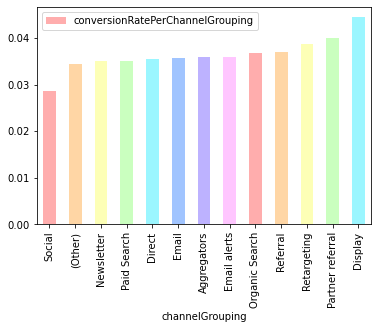

In [8]:
query7 = """
    SELECT channelGrouping, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerChannelGrouping
    FROM apprenticeship-299321.sample_data.datatable
    GROUP BY channelGrouping
    ORDER BY conversionRatePerChannelGrouping
"""
runQuery(query7).plot.bar(x='channelGrouping', y='conversionRatePerChannelGrouping', color=rainbowArray)


    dateString yearString monthString dayString dateStringWithHyphens  \
0     20170101       2017          01        01            2017-01-01   
1     20170102       2017          01        02            2017-01-02   
2     20170103       2017          01        03            2017-01-03   
3     20170104       2017          01        04            2017-01-04   
4     20170105       2017          01        05            2017-01-05   
..         ...        ...         ...       ...                   ...   
500   20180516       2018          05        16            2018-05-16   
501   20180517       2018          05        17            2018-05-17   
502   20180518       2018          05        18            2018-05-18   
503   20180519       2018          05        19            2018-05-19   
504   20180520       2018          05        20            2018-05-20   

    dateFormat  conversionRate  
0   2017-01-01          0.0313  
1   2017-01-02          0.0308  
2   2017-01-03          

<AxesSubplot:xlabel='dateFormat'>

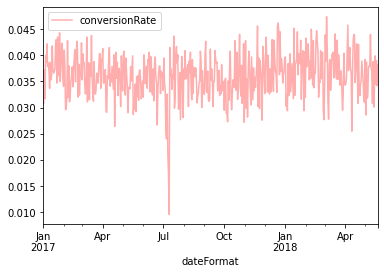

In [72]:
# SET @YearString = LEFT(CAST(date AS string), 4)

# query8 = """
#     DECLARE YearString STRING;
#     SET YearString = LEFT(CAST(date AS string), 4);
#     SELECT CAST(date AS string) AS dateString, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString
#     ORDER BY dateString ASC
# """

# query8 = """
#     SELECT CAST(date AS string) AS dateString, LEFT(CAST(date AS string), 4) AS yearString, SUBSTRING(CAST(date AS string), 4, 6) AS monthString, RIGHT(CAST(date AS string), 2) AS dayString, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString
#     ORDER BY dateString ASC
# """

# query8 = """
#     SELECT CAST(date AS string) AS dateString, 
#         LEFT(CAST(date AS string), 4) AS yearString, 
#         SUBSTRING(CAST(date AS string), 5, 2) AS monthString, 
#         RIGHT(CAST(date AS string), 2) AS dayString, 
#         CONCAT(yearString, "-", monthString, "-", "dayString") AS dateStringWithHyphens,
#         ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString, yearString, monthString, dayString, dateStringWithHyphens
#     ORDER BY dateString ASC
# """

# query8 = """
#     SELECT CAST(date AS string) AS dateString, 
#         LEFT(CAST(date AS string), 4) AS yearString, 
#         SUBSTRING(CAST(date AS string), 5, 2) AS monthString, 
#         RIGHT(CAST(date AS string), 2) AS dayString, 
#         CONCAT(LEFT(CAST(date AS string), 4), "-", 
#             SUBSTRING(CAST(date AS string), 5, 2), "-", 
#             RIGHT(CAST(date AS string), 2)) AS dateStringWithHyphens,
#         DATE_FORMAT(CONCAT(LEFT(CAST(date AS string), 4), "-", 
#             SUBSTRING(CAST(date AS string), 5, 2), "-", 
#             RIGHT(CAST(date AS string), 2)), "%d %M %Y"),
#         ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
#     FROM `apprenticeship-299321.sample_data.datatable`
#     GROUP BY dateString, yearString, monthString, dayString, dateStringWithHyphens
#     ORDER BY dateString ASC
# """

query8 = """
    SELECT CAST(date AS string) AS dateString, 
        LEFT(CAST(date AS string), 4) AS yearString, 
        SUBSTRING(CAST(date AS string), 5, 2) AS monthString, 
        RIGHT(CAST(date AS string), 2) AS dayString, 
        CONCAT(LEFT(CAST(date AS string), 4), "-", 
            SUBSTRING(CAST(date AS string), 5, 2), "-", 
            RIGHT(CAST(date AS string), 2)) AS dateStringWithHyphens,
            
        DATE(CAST(LEFT(CAST(date AS string), 4) AS INT64), 
            CAST(SUBSTRING(CAST(date AS string), 5, 2) AS INT64), 
            CAST(RIGHT(CAST(date AS string), 2) AS INT64)) AS dateFormat,
            
        ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY dateString, yearString, monthString, dayString, dateStringWithHyphens, dateFormat
    ORDER BY dateString ASC
"""
runQuery(query8).plot.line(x='dateFormat', y='conversionRate', color=singleColorArray)


In [ ]:
# #legacySQL